# Jonathan Halverson
# Wednesday, April 13, 2016
# PCA

Principal component analysis is a linear transformation technique aimed at the dimensionality reduction or feature extraction. It is useful for reducing the number of features to a small number of new features that retain most of the important information. The idea is to find the directions of maximum variance and project the high-dimensional data into this new subspace. The principal components are orthogonal axes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
df = pd.read_csv('wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

### PCA: Step-by-step

In [4]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

After the standardization, let's check that the columns have mean zero and variance one:

In [5]:
print np.mean(X_std, axis=0)
print np.var(X_std, axis=0)

[ -8.38280756e-16  -1.19754394e-16  -8.37033314e-16  -3.99181312e-17
  -3.99181312e-17   0.00000000e+00  -3.99181312e-16   3.59263181e-16
  -1.19754394e-16   3.49283648e-17   1.99590656e-16   3.19345050e-16
  -1.59672525e-16]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Below the covariance matrix is computed. By setting rowvar to 0, it treats the columns as the variables and the observations as the rows:

In [6]:
covar_matrix = np.cov(X_std, rowvar=0)
covar_matrix.shape

(13, 13)

The elements along the diagonal are the variance of each feature. Here is an off-diagonal element and it's explicit calculation:

In [7]:
covar_matrix[0, 1]

0.094930256960755341

In [8]:
X_std[:,0].dot(X_std[:,1]) / len(df)

0.094396940910414007

Compute the eigenvalues and eigenvectors: $\mathrm{det}(A- \lambda I) = 0$ and $Av=\lambda v$.

In [9]:
from numpy.linalg import eigh
eigenvalues, eigenvectors = eigh(covar_matrix)

(-1, 13)

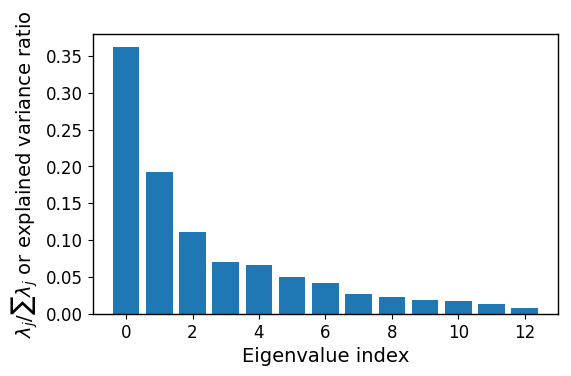

In [10]:
lambda_ratio = [eig_val / eigenvalues.sum() for eig_val in sorted(eigenvalues, reverse=True)]
plt.bar(range(X_std.shape[1]), lambda_ratio, align='center')
plt.xlabel('Eigenvalue index')
plt.ylabel('$\lambda_j / \sum \lambda_j$ or explained variance ratio')
plt.xlim(-1, 13)

Below the eigen pairs are sorted. The projection matrix W is formed:

In [11]:
eigen_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(eigenvalues.size)]
eigen_pairs.sort(reverse=True)

In [12]:
W = np.column_stack((eigen_pairs[0][1], eigen_pairs[1][1]))
W

array([[-0.1443294 ,  0.48365155],
       [ 0.24518758,  0.22493093],
       [ 0.00205106,  0.31606881],
       [ 0.23932041, -0.0105905 ],
       [-0.14199204,  0.299634  ],
       [-0.39466085,  0.06503951],
       [-0.4229343 , -0.00335981],
       [ 0.2985331 ,  0.02877949],
       [-0.31342949,  0.03930172],
       [ 0.0886167 ,  0.52999567],
       [-0.29671456, -0.27923515],
       [-0.37616741, -0.16449619],
       [-0.28675223,  0.36490283]])

Project the data onto the lower-dimensional subspace:

In [13]:
X_pca = X_std.dot(W)

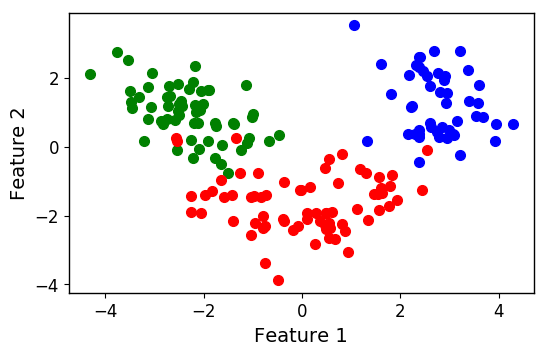

In [14]:
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro')
plt.plot(X_pca[y == 3, 0], X_pca[y == 3, 1], 'bo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

We can see that the data is now almost perfectly linearly separable.

### PCA implementation of scikit-learn 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_scikit = pca.fit_transform(X_std)

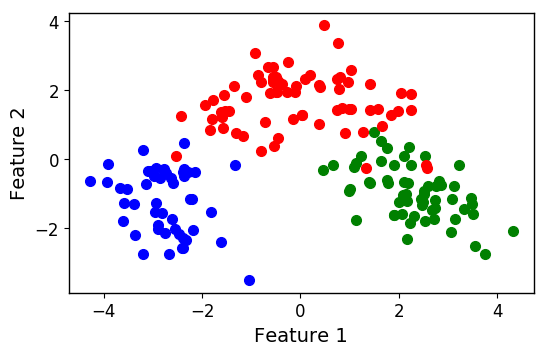

In [16]:
plt.plot(X_pca_scikit[y == 1, 0], X_pca_scikit[y == 1, 1], 'go')
plt.plot(X_pca_scikit[y == 2, 0], X_pca_scikit[y == 2, 1], 'ro')
plt.plot(X_pca_scikit[y == 3, 0], X_pca_scikit[y == 3, 1], 'bo')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Let's examine the eigenvalues of the full feature matrix:

(-1, 13)

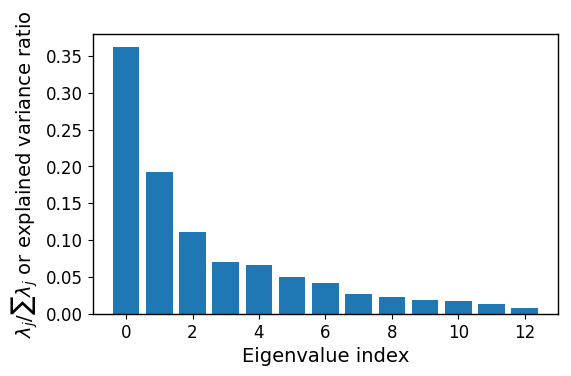

In [17]:
pca = PCA(n_components=None)
pca.fit_transform(X_std)
plt.bar(range(X_std.shape[1]), pca.explained_variance_ratio_, align='center')
plt.xlabel('Eigenvalue index')
plt.ylabel('$\lambda_j / \sum \lambda_j$ or explained variance ratio')
plt.xlim(-1, 13)

### Another example

In [18]:
m = 4
b = 1.0
points = 200
x1 = np.linspace(1, 4, num=points)
x2 = m * x1 + np.random.randn(points)
x3 = np.random.randn(points)

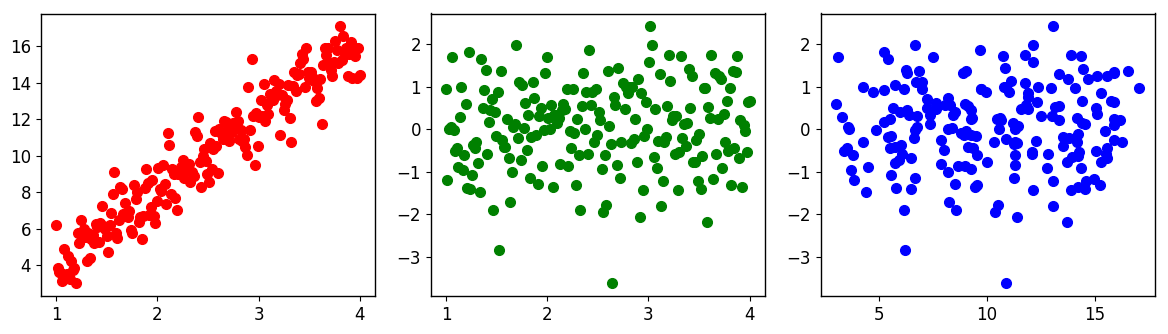

In [19]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5))
ax0.plot(x1, x2, 'ro')
ax1.plot(x1, x3, 'go')
ax2.plot(x2, x3, 'bo')
plt.tight_layout()

In [20]:
X = np.column_stack((x1, x2, x3))
X_std = stdsc.fit_transform(X)
X_std.var(axis=0)

array([ 1.,  1.,  1.])

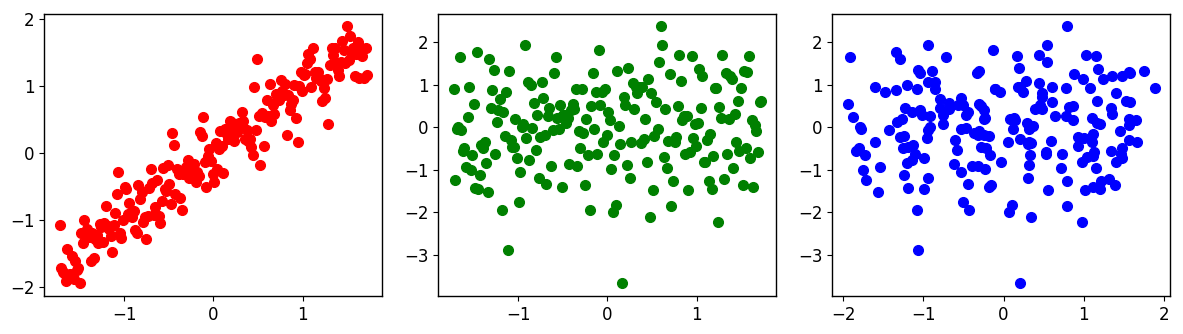

In [21]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 3.5))
ax0.plot(X_std[:,0], X_std[:,1], 'ro')
ax1.plot(X_std[:,0], X_std[:,2], 'go')
ax2.plot(X_std[:,1], X_std[:,2], 'bo')
plt.tight_layout()

In [22]:
# set bias to 1 to make diagonal elements (variance) equal to 1
covar_matrix = np.cov(X_std, rowvar=0, bias=0)
covar_matrix

array([[ 1.00502513,  0.96406306,  0.06492936],
       [ 0.96406306,  1.00502513,  0.04207516],
       [ 0.06492936,  0.04207516,  1.00502513]])

(-1, 13)

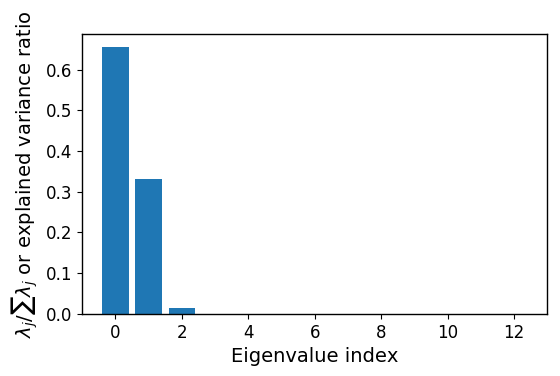

In [23]:
eigenvalues, eigenvectors = eigh(covar_matrix)
lambda_ratio = [eig_val / eigenvalues.sum() for eig_val in sorted(eigenvalues, reverse=True)]
plt.bar(range(X_std.shape[1]), lambda_ratio, align='center')
plt.xlabel('Eigenvalue index')
plt.ylabel('$\lambda_j / \sum \lambda_j$ or explained variance ratio')
plt.xlim(-1, 13)

In [24]:
eigen_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(eigenvalues.size)]
eigen_pairs.sort(reverse=True)

In [25]:
W = np.column_stack((eigen_pairs[0][1], eigen_pairs[1][1]))
W

array([[-0.705424  , -0.04311448],
       [-0.70450487, -0.06688427],
       [-0.07778095,  0.99682879]])

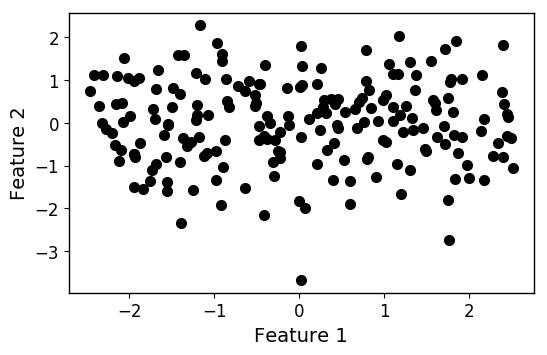

In [26]:
X_pca = X_std.dot(W)
plt.plot(X_pca[:,0], X_pca[:,1], 'ko')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')